- Identify the data types you are working with.
- Examine the distributions of your data, numerically and/or visually.
- Identify outliers.
- Identify missing data and look for patterns of missing data.
- Describe how your EDA will inform your modeling decisions and process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as datetime


## Import data

In [2]:
tickers = pd.read_csv('../dataset/tickers.csv')
#name the header ticker

In [3]:
tickers

,0
0,ABIO
1,AGTC
2,AIM
3,AIRT
4,ALSK
...,...
1943,CAGZ
1944,PTSC
1945,JUHL
1946,OPST


In [4]:
# tickers['ticker'].str.contains('WNEB').any()

### price_volume_sorted data

In [5]:
price_volume_sorted = pd.read_csv('../dataset/price_volume_sorted.csv',  parse_dates=['date'])
price_volume_sorted.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13


- date - Date for which the price is given
- open - Price of the stock at market open (In USD)
- high - Highest price reached in the day
- low - Lowest price reached in the day
- close - Closing price for the day
- volume - Number of shares traded -Name` - the stock's ticker name
- dividends - how much dividends was given
- closeunadj - closing price without adjusting for stock split and other corporate actions such as dilution

In [6]:

#for each stock

#get the first date

#if it is more than 2015-01-02

    #then create entries from 


In [7]:
price_volume_sorted.describe()

,open,high,low,close,volume,dividends,closeunadj
count,2.397148e+06,2.397148e+06,2.397148e+06,2.397148e+06,2.397148e+06,2.397148e+06,2.397148e+06
mean,8.920314e+04,9.441645e+04,8.400394e+04,8.785182e+04,2.199069e+05,5.163513e-03,4.232264e+01
std,8.560189e+06,9.156852e+06,8.064929e+06,8.443640e+06,2.918538e+06,2.763107e+00,2.181898e+03
min,1.000000e-05,1.000000e-04,1.000000e-05,1.000000e-04,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.530000e+00,1.590000e+00,1.500000e+00,1.530000e+00,1.751000e+03,0.000000e+00,8.600000e-01
50%,5.750000e+00,5.910000e+00,5.600000e+00,5.750000e+00,1.578200e+04,0.000000e+00,3.560000e+00
75%,1.500000e+01,1.523000e+01,1.475000e+01,1.500000e+01,7.627700e+04,0.000000e+00,1.137000e+01
max,1.626238e+09,2.049598e+09,1.555678e+09,1.673278e+09,9.552109e+08,3.080000e+03,1.722500e+05


In [8]:
price_volume_sorted.isnull().sum()

ticker         0
date           0
open           0
high           0
low            0
close          0
volume         0
dividends      0
closeunadj     0
lastupdated    0
dtype: int64

In [9]:
price_volume_sorted.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13


In [10]:
price_volume_sorted.tail()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
2397143,ZYXI,2020-12-14,13.10,13.59,13.100,13.34,446678.0,0.0,13.34,2020-12-14
2397144,ZYXI,2020-12-15,13.45,13.45,13.030,13.18,372095.0,0.0,13.18,2020-12-15
2397145,ZYXI,2020-12-16,13.24,13.95,13.240,13.87,560581.0,0.0,13.87,2020-12-16
2397146,ZYXI,2020-12-17,13.94,14.29,13.701,14.25,409889.0,0.0,14.25,2020-12-17
2397147,ZYXI,2020-12-18,14.25,14.39,13.730,14.00,551332.0,0.0,14.00,2020-12-18


In [11]:
price_volume_sorted.dtypes

ticker                 object
date           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
dividends             float64
closeunadj            float64
lastupdated            object
dtype: object

In [12]:
# check the number of business days for which the records as missing
rng = pd.date_range(start='2015-01-02', end='2020-12-18', freq='B')
rng[~rng.isin(price_volume_sorted.date.unique())]

DatetimeIndex(['2015-01-19', '2015-02-16', '2015-04-03', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-03-25',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-04-14', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-12-25', '2018-01-01', '2018-01-15',
               '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19',
               '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28',
               '2019-12-25', '2020-01-01', '2020-01-20', '2020-02-17',
               '2020-04-10', '2020-05-25', '2020-07-03', '2020-09-07',
               '2020-11-26'],
              dtype='datetime64[ns]', freq=None

In [13]:
len(rng[~rng.isin(price_volume_sorted.date.unique())])

53

### There are about 53 days for which the stock price data is missing. This could lead to potential problems with the analysis.



In [14]:
price_volume_sorted.groupby('ticker').count().sort_values('date', ascending=False)['date']

ticker
AAME     1503
MARPS    1503
NBN      1503
NBIO     1503
NAVB     1503
         ... 
HRZL      103
IHSI      101
BLKG       98
CAGZ       98
IDAH       98
Name: date, Length: 1948, dtype: int64

In [15]:
# don't really know what they are doing here
# gdf = df[df.Name == 'AABA']
# cdf = df[df.Name == 'CAT']

# cdf[~cdf.Date.isin(gdf.Date)]


### Let's check if all the listed companies have an entry on each date.



In [16]:
# Total number of companies
price_volume_sorted.ticker.unique().size

1948

In [17]:
a = price_volume_sorted.groupby('date').ticker.unique().apply(len)


In [18]:
type(a)

pandas.core.series.Series

In [19]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(a)

date
2015-01-02    1904
2015-01-05    1904
2015-01-06    1905
2015-01-07    1905
2015-01-08    1906
2015-01-09    1906
2015-01-12    1906
2015-01-13    1906
2015-01-14    1906
2015-01-15    1906
2015-01-16    1906
2015-01-20    1906
2015-01-21    1907
2015-01-22    1907
2015-01-23    1907
2015-01-26    1907
2015-01-27    1908
2015-01-28    1908
2015-01-29    1909
2015-01-30    1912
2015-02-02    1914
2015-02-03    1914
2015-02-04    1914
2015-02-05    1916
2015-02-06    1916
2015-02-09    1916
2015-02-10    1917
2015-02-11    1917
2015-02-12    1917
2015-02-13    1920
2015-02-17    1920
2015-02-18    1921
2015-02-19    1921
2015-02-20    1921
2015-02-23    1921
2015-02-24    1921
2015-02-25    1921
2015-02-26    1921
2015-02-27    1921
2015-03-02    1922
2015-03-03    1922
2015-03-04    1922
2015-03-05    1922
2015-03-06    1923
2015-03-09    1923
2015-03-10    1923
2015-03-11    1923
2015-03-12    1923
2015-03-13    1923
2015-03-16    1923
2015-03-17    1924
2015-03-18    1924
2015-03

### This confirms that some companies do not have a stock price entry on each day.

## Basic EDA and Feature Engineering

### Price
- Since we have four values of stock price for each day, let's create a feature called Price which is the average of all these values.

In [20]:
df = price_volume_sorted
#store it as df

In [21]:
values = (df['high'] + df['low'] + df['open'] + df['close'])/4
df = df.assign(Price=values)

In [22]:
df.head()


,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13,4.00750
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13,3.95500
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13,3.89250
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13,3.90225
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13,3.93375


In [23]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,open,high,low,close,volume,dividends,closeunadj,Price
count,2397148.00000,2397148.00000,2397148.00000,2397148.00000,2397148.00000,2397148.00000,2397148.00000,2397148.00000
mean,89203.14106,94416.44721,84003.94079,87851.82232,219906.91451,0.00516,42.32264,88868.83785
std,8560189.38525,9156852.49674,8064928.76648,8443640.11737,2918537.65131,2.76311,2181.89773,8546078.74477
min,0.00001,0.00010,0.00001,0.00010,0.00000,0.00000,0.00000,0.00006
25%,1.53000,1.59000,1.50000,1.53000,1751.00000,0.00000,0.86000,1.53500
50%,5.75000,5.91000,5.60000,5.75000,15782.00000,0.00000,3.56000,5.75000
75%,15.00000,15.23000,14.75000,15.00000,76277.00000,0.00000,11.37000,15.00000
max,1626238373.76500,2049597950.40600,1555678444.32500,1673278326.72500,955210864.00000,3080.00000,172250.00000,1724509875.49350


In [24]:
np.percentile(df['Price'] , 47)

5.01625

Comments:
- 75% of the stocks have a price of under 15 USD, indicating that this segment of the stock market is mostly dominated by companies with low stock price.
- 25% of the stocks have a price of under 1.53 USD, which is below the price at which some academics would consider to be penny stocks (i.e. stocks less than 5 USD)
- roughly 47% of stocks in this universe would be considered as penny stocks as they are 5 USD or less


In [25]:
df.head()


,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13,4.00750
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13,3.95500
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13,3.89250
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13,3.90225
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13,3.93375


In [26]:
len(df.ticker.unique())

1948

In [27]:
tickers.head(10)

,0
0,ABIO
1,AGTC
2,AIM
3,AIRT
4,ALSK
5,ALT
6,AVGR
7,BCDA
8,BEAT
9,BLIN


### Growth

In [28]:
stock_names = df.ticker.unique()
stock_names

array(['AAME', 'AAOI', 'AAPC', ..., 'ZQKSQ', 'ZSAN', 'ZYXI'], dtype=object)

In [29]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13,4.00750
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13,3.95500
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13,3.89250
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13,3.90225
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13,3.93375


In [30]:
dates = df.groupby('ticker').agg({'date': [np.min, np.max]})
dates

date           
             amin       amax
ticker                      
AAME   2015-01-02 2020-12-18
AAOI   2015-01-02 2020-12-18
AAPC   2015-04-29 2017-10-04
ABCD   2015-01-02 2018-12-17
ABCP   2015-01-02 2020-12-18
...           ...        ...
ZNOG   2015-01-02 2020-12-18
ZPCM   2015-01-02 2017-05-15
ZQKSQ  2015-01-02 2016-02-11
ZSAN   2015-01-27 2020-12-18
ZYXI   2015-01-02 2020-12-18

[1948 rows x 2 columns]

In [31]:
dates.columns = dates.columns.droplevel(0)
dates

,amin,amax
ticker,,
AAME,2015-01-02,2020-12-18
AAOI,2015-01-02,2020-12-18
AAPC,2015-04-29,2017-10-04
ABCD,2015-01-02,2018-12-17
ABCP,2015-01-02,2020-12-18
...,...,...
ZNOG,2015-01-02,2020-12-18
ZPCM,2015-01-02,2017-05-15
ZQKSQ,2015-01-02,2016-02-11


In [32]:
dates['amin']

ticker
AAME    2015-01-02
AAOI    2015-01-02
AAPC    2015-04-29
ABCD    2015-01-02
ABCP    2015-01-02
           ...    
ZNOG    2015-01-02
ZPCM    2015-01-02
ZQKSQ   2015-01-02
ZSAN    2015-01-27
ZYXI    2015-01-02
Name: amin, Length: 1948, dtype: datetime64[ns]

In [33]:
df.groupby('ticker').first().Price


ticker
AAME       4.0075
AAOI      11.0175
AAPC      10.0400
ABCD       1.7700
ABCP       1.6625
           ...   
ZNOG       1.3925
ZPCM       2.0000
ZQKSQ      2.2100
ZSAN     232.8000
ZYXI       0.1800
Name: Price, Length: 1948, dtype: float64

In [34]:
price_mapping = {name : price for name, price in zip(stock_names, df.groupby('ticker').first().Price)}
price_mapping

{'AAME': 4.0075,
 'AAOI': 11.0175,
 'AAPC': 10.040000000000001,
 'ABCD': 1.77,
 'ABCP': 1.6625,
 'ABDC': 12.54,
 'ABEO': 3.3425,
 'ABHD': 0.28750000000000003,
 'ABIO': 127.071,
 'ABMC': 0.13,
 'ACER': 63.542,
 'ACFC': 4.0275,
 'ACFN': 0.755,
 'ACHV': 5065.55425,
 'ACIIQ': 17.2375,
 'ACMC': 4.49,
 'ACNB': 21.2625,
 'ACRX': 6.7749999999999995,
 'ACSF': 12.325,
 'ACTL': 3.0,
 'ACU': 20.0425,
 'ACUR': 2.42525,
 'ACW': 4.38,
 'ACY': 8.52275,
 'ADEP': 8.6475,
 'ADGE': 0.63625,
 'ADMA': 11.350000000000001,
 'ADMG': 2.09,
 'ADMP': 6.0975,
 'ADMT': 0.24,
 'ADNC': 4.435,
 'ADUS': 23.977499999999996,
 'ADYX': 316.2,
 'AE': 49.129999999999995,
 'AEGG': 0.11,
 'AEHR': 2.69,
 'AEPI': 58.089999999999996,
 'AERG': 0.004,
 'AERI': 30.3175,
 'AERT': 0.08,
 'AEY': 2.3875,
 'AFCB': 25.4,
 'AFFMQ': 1.24,
 'AFHIF': 16.677500000000002,
 'AFPW': 0.004,
 'AGHC': 8.3475,
 'AGNU': 1.75,
 'AGRX': 6.2425,
 'AGTC': 21.2025,
 'AGYS': 12.4305,
 'AHC': 10.3875,
 'AHH': 9.5075,
 'AHPI': 3.5250000000000004,
 'AIII': 1.0

In [35]:
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['ticker'].values)))

In [36]:
base_mapping

array([4.0075, 4.0075, 4.0075, ..., 0.18  , 0.18  , 0.18  ])

In [37]:
df['Growth'] = df['Price'] / base_mapping - 1

In [38]:
df.head()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price,Growth
0,AAME,2015-01-02,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13,4.00750,0.000000
1,AAME,2015-01-05,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13,3.95500,-0.013100
2,AAME,2015-01-06,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13,3.89250,-0.028696
3,AAME,2015-01-07,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13,3.90225,-0.026263
4,AAME,2015-01-08,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13,3.93375,-0.018403


In [41]:
df.tail()

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price,Growth
2397143,ZYXI,2020-12-14,13.10,13.59,13.100,13.34,446678.0,0.0,13.34,2020-12-14,13.28250,72.791667
2397144,ZYXI,2020-12-15,13.45,13.45,13.030,13.18,372095.0,0.0,13.18,2020-12-15,13.27750,72.763889
2397145,ZYXI,2020-12-16,13.24,13.95,13.240,13.87,560581.0,0.0,13.87,2020-12-16,13.57500,74.416667
2397146,ZYXI,2020-12-17,13.94,14.29,13.701,14.25,409889.0,0.0,14.25,2020-12-17,14.04525,77.029167
2397147,ZYXI,2020-12-18,14.25,14.39,13.730,14.00,551332.0,0.0,14.00,2020-12-18,14.09250,77.291667


In [39]:
# look at the basic statistics and supress the scientific notations
df.Growth.describe().apply(lambda x: format(x, 'f'))



count    2397148.000000
mean           0.210428
std            7.354094
min           -1.000000
25%           -0.615202
50%           -0.143053
75%            0.244509
max          997.650000
Name: Growth, dtype: object

The worst performing company had a decline of 100% in their shares compared to their first ever opening price and the best company had a 997% increase in their share price. 

# Time Series Analysis

In [42]:

# Let's find out the top 5 best and worst performing stocks!

sample_dates = pd.date_range(start='2015-01-02', end='2020-12-18', freq='B')


In [44]:
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates


DatetimeIndex(['2015-12-31', '2016-12-30', '2017-12-29', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)

In [47]:
#save the worst stocks into a dataframe
worst_stocks = df[df.date == df.date.max()].sort_values('Growth').head(5)
worst_stocks

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price,Growth
1848212,RSLS,2020-12-18,3.550,3.550,3.550,3.550,292.0,0.0,3.550,2020-12-18,3.55000,-1.000000
398884,CEI,2020-12-18,0.900,0.916,0.865,0.865,1788273.0,0.0,0.865,2020-12-18,0.88650,-1.000000
1110012,INPX,2020-12-18,1.020,1.040,1.000,1.000,4413429.0,0.0,1.000,2020-12-18,1.01500,-0.999999
1497987,NSPR,2020-12-18,0.354,0.354,0.325,0.330,807885.0,0.0,0.330,2020-12-18,0.34075,-0.999999
936565,GOVX,2020-12-18,3.400,3.540,3.300,3.300,316579.0,0.0,3.300,2020-12-18,3.38500,-0.999999


In [51]:
#save the names of the wrost stocks as an array
ws = worst_stocks.ticker.values
ws

array(['RSLS', 'CEI', 'INPX', 'NSPR', 'GOVX'], dtype=object)

In [49]:
#save the best stocks into a dataframe

best_stocks = df[df.date == df.date.max()].sort_values('Growth', ascending=False).head(5)
best_stocks

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price,Growth
1577888,OPNT,2020-12-18,8.380,8.38,8.130,8.140,40286.0,0.0,8.140,2020-12-18,8.25750,164.150000
2397147,ZYXI,2020-12-18,14.250,14.39,13.730,14.000,551332.0,0.0,14.000,2020-12-18,14.09250,77.291667
1977528,SMLR,2020-12-18,84.690,85.00,80.200,84.400,3286.0,0.0,84.400,2020-12-18,83.57250,41.639031
885187,GCEH,2020-12-18,0.165,0.18,0.161,0.171,67387.0,0.0,0.171,2020-12-18,0.16925,41.312500
799558,FIVN,2020-12-18,177.890,177.89,171.690,176.600,822605.0,0.0,176.600,2020-12-18,176.01750,38.483513


In [54]:
#save the names of the best stocks as an array

bs = best_stocks.ticker.values
bs

array(['OPNT', 'ZYXI', 'SMLR', 'GCEH', 'FIVN'], dtype=object)

In [58]:
#make another copy of df and set the date as index
tdf = df.copy()
tdf = df.set_index('date')
tdf

,ticker,open,high,low,close,volume,dividends,closeunadj,lastupdated,Price,Growth
date,,,,,,,,,,,
2015-01-02,AAME,3.990,4.03,3.980,4.03,11443.0,0.0,4.03,2018-06-13,4.00750,0.000000
2015-01-05,AAME,3.900,4.01,3.900,4.01,13727.0,0.0,4.01,2018-06-13,3.95500,-0.013100
2015-01-06,AAME,3.950,3.95,3.750,3.92,9743.0,0.0,3.92,2018-06-13,3.89250,-0.028696
2015-01-07,AAME,3.899,3.92,3.870,3.92,1486.0,0.0,3.92,2018-06-13,3.90225,-0.026263
2015-01-08,AAME,3.920,3.95,3.915,3.95,2200.0,0.0,3.95,2018-06-13,3.93375,-0.018403
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-14,ZYXI,13.100,13.59,13.100,13.34,446678.0,0.0,13.34,2020-12-14,13.28250,72.791667
2020-12-15,ZYXI,13.450,13.45,13.030,13.18,372095.0,0.0,13.18,2020-12-15,13.27750,72.763889
2020-12-16,ZYXI,13.240,13.95,13.240,13.87,560581.0,0.0,13.87,2020-12-16,13.57500,74.416667


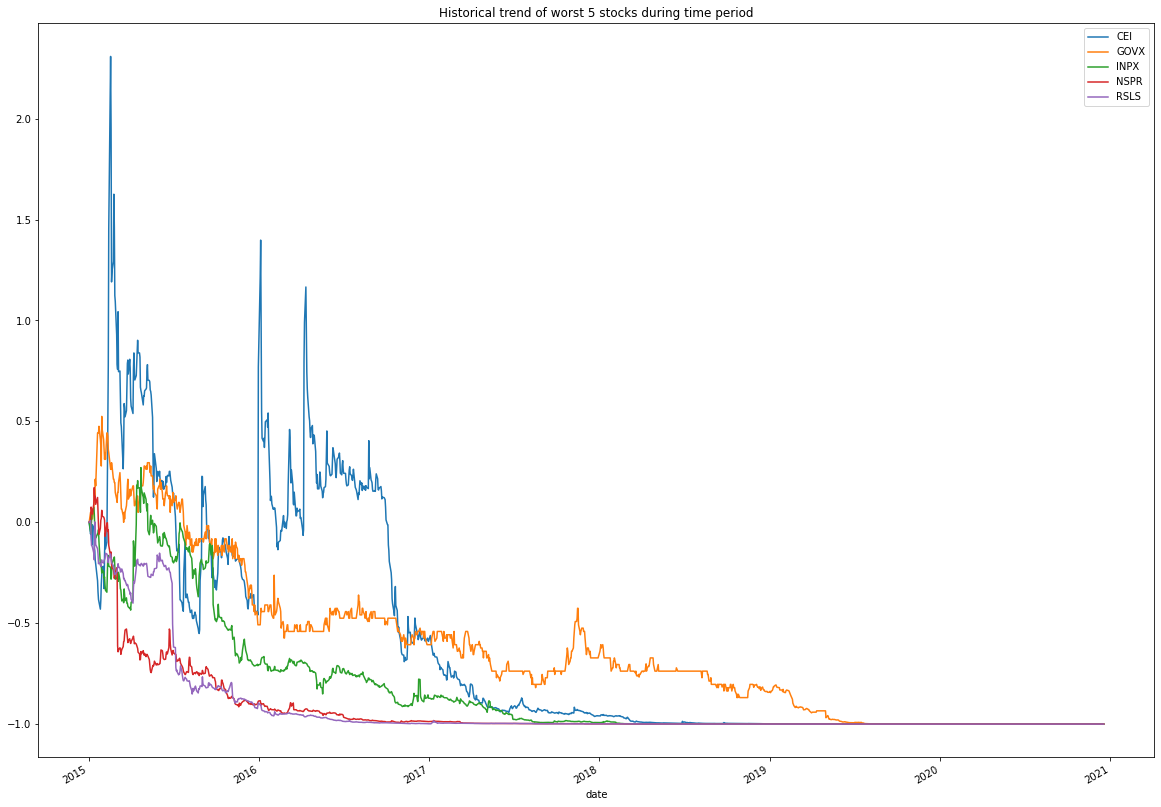

In [63]:
#plot the 5 worst stocks
plt.rcParams["figure.figsize"] = (20,15)

tdf[tdf.ticker.isin(ws)].groupby('ticker').Growth.plot(title='Historical trend of worst 5 stocks during time period', legend=True)
plt.show()

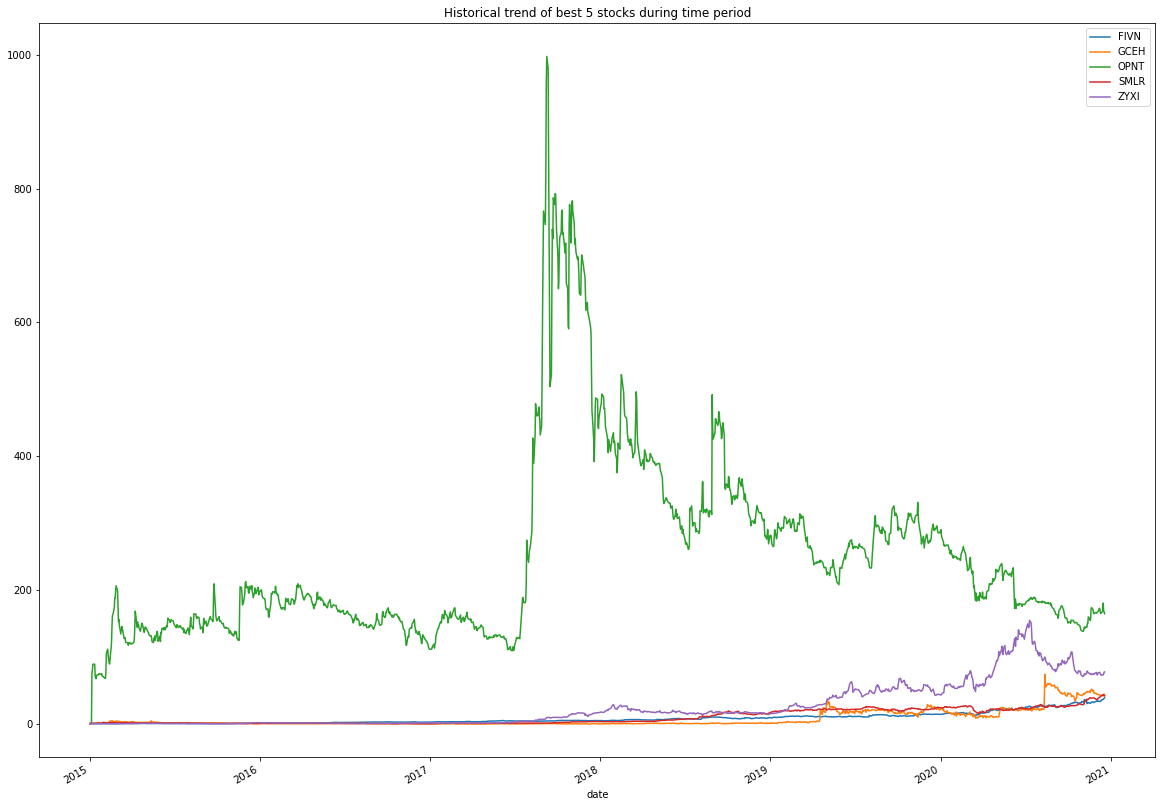

In [65]:
#plot the 5 best stocks

plt.rcParams["figure.figsize"] = (20,15)

tdf[tdf.ticker.isin(bs)].groupby('ticker').Growth.plot(title='Historical trend of best 5 stocks during time period', legend=True)
plt.show()

# Correlation Analysis

<AxesSubplot:xlabel='ticker', ylabel='ticker'>

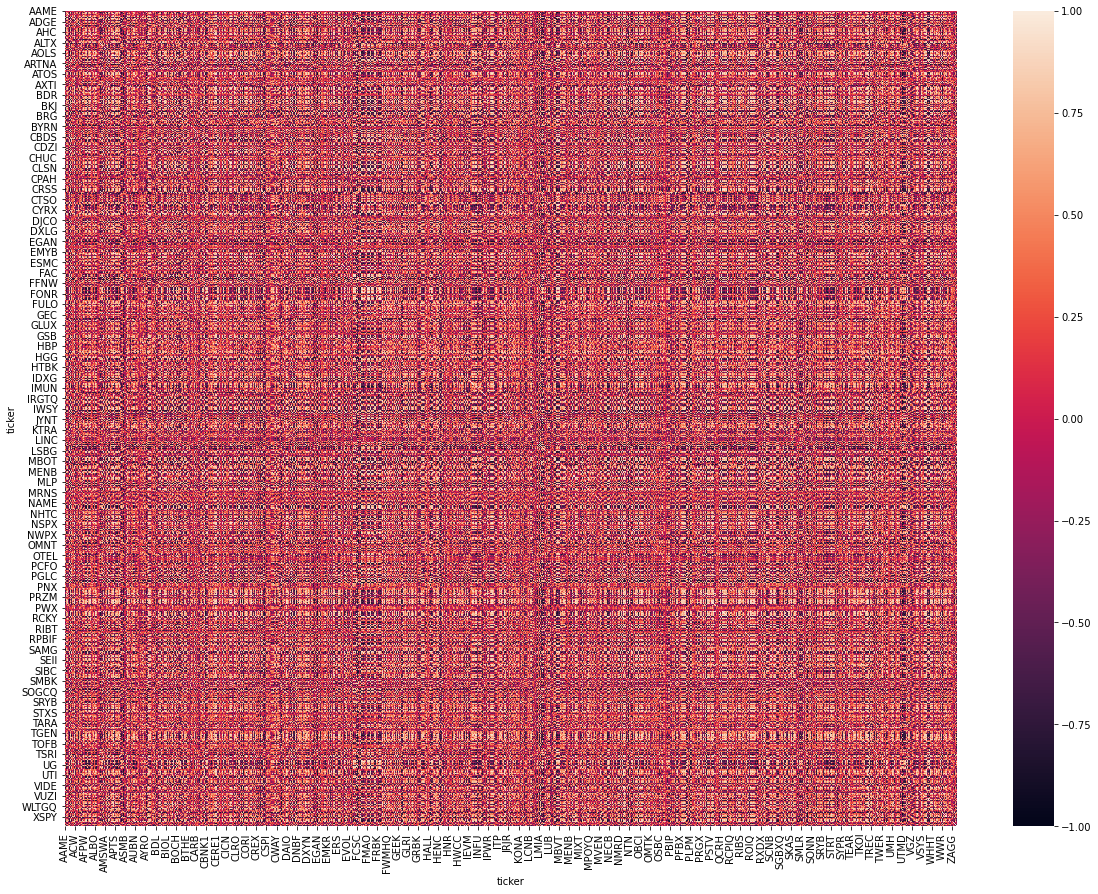

In [70]:
corr = df.pivot('date', 'ticker', 'Growth').corr()
sns.heatmap(corr)



In [103]:
def unique_corelations(indices):
    mapping = {}
    for record in indices:
        (stock_a, stock_b) = record
        value_list = mapping.get(stock_a)
        if value_list:
            if stock_b not in value_list:
                value_list.append(stock_b)
                mapping.update({stock_a: value_list})
        else:
            mapping.update({stock_a: [stock_b]})

    return mapping

def filter_corelations_positive(corr, threshold):
    indices = np.where(corr > threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping
    
def filter_corelations_negative(corr, threshold):
    indices = np.where(corr < threshold)
    indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    mapping = unique_corelations(indices)
    return mapping

In [133]:
#filter correlation with threshold more than 0.9
positive_cor_strong = filter_corelations_positive(corr, threshold=0.9)


In [142]:
a = len(positive_cor_strong.keys())
len(positive_cor_strong.keys())

1379

In [143]:
#filter correlation with threshold more than 0.5
positive_cor_weak = filter_corelations_positive(corr, threshold=0.5)
b = len(positive_cor_weak.keys())
len(positive_cor_weak.keys())

1939

In [137]:
#filter correlation with threshold less than -0.9
negative_cor_strong = filter_corelations_negative(corr, threshold=-0.9)

In [144]:
c = len(negative_cor_strong.keys())
len(negative_cor_strong.keys())

815

In [145]:
#filter correlation with threshold less than -0.5
negative_cor_weak = filter_corelations_negative(corr, threshold=-0.5)
d = len(negative_cor_weak.keys())
len(negative_cor_weak.keys())

1930

<AxesSubplot:>

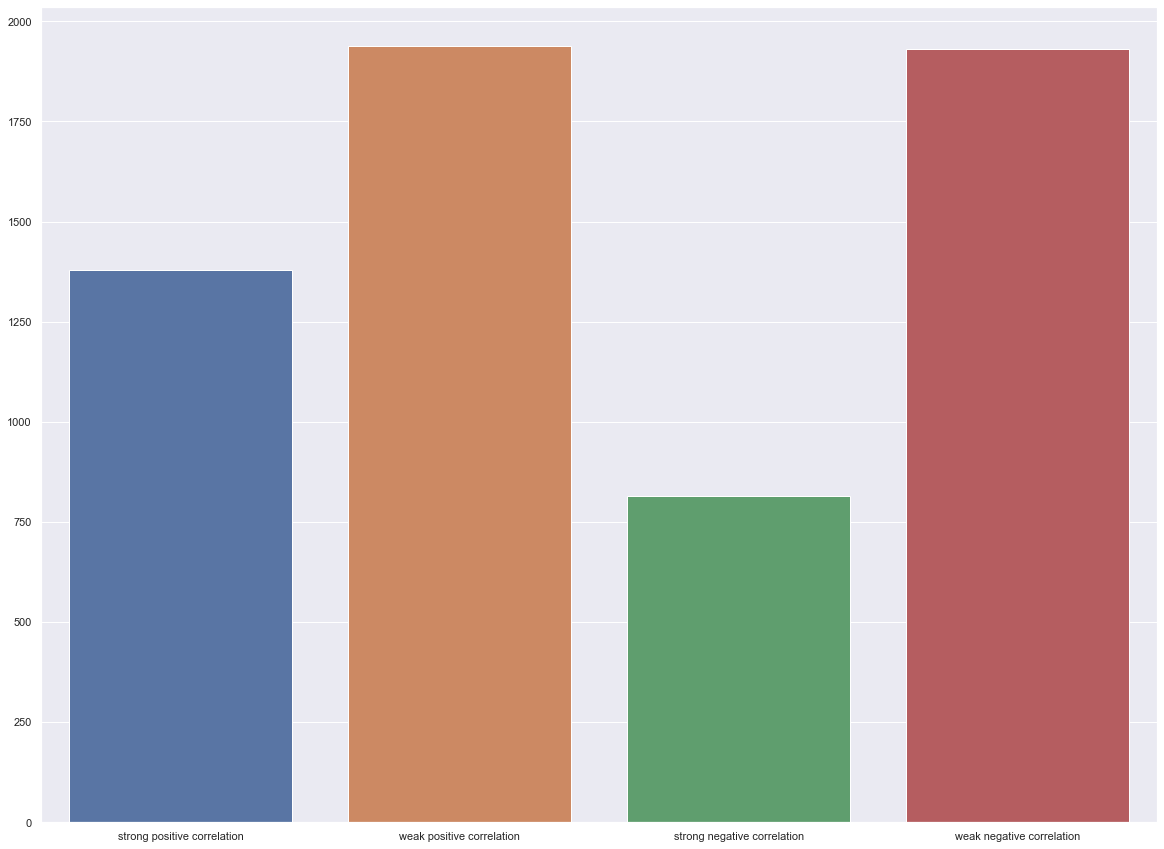

In [151]:
sns.set()
sns.barplot(x=['strong positive correlation','weak positive correlation','strong negative correlation','weak negative correlation'],y=[a,b,c,d])

From the above results, we can note the following:-

- There is a Strong Positive corelation in the stock growth of around 1379 stocks out of 1948 stocks, though some could be due to collinearity. This is most likely due to the fact that microcap stocks as an asset class is highly sensitive to liquidity flight which occurs during periods of high market stress as investors unload stocks that are deemed as more risky in search of large cap stocks that can provide ample liquidity. this is also known as Flight-to-Safety
- There is a Strong Negative corelation in the stock growth of around 1946 stocks, this could be because there are many micro cap stocks that have contrasting busniess models. for example, One would expect that sustained high fuel costs would generally depress the profits of airlines, and thus their stocks' values.


In [ ]:
stop here

In [ ]:
why is BCAR in stock_names but not price_mapping?
#i think its because the starting date is different for some stocks

In [ ]:
stock_names = tickers['ticker'].to_numpy()
#store the stock ticker as stock_names

day_prices = df[df.date == df.date.min()].Price
# find the day prices at the start of our time period which is 2015-01-02

price_mapping = {n : c for n, c in zip(stock_names, day_prices)}
# Map the price of each stock to that


In [ ]:
if 'BCAR' in stock_names:
  print("yes")
else:
  print("no")

In [ ]:
price_mapping

In [ ]:
df

In [ ]:
df[df['ticker'] =='BCAR']

In [ ]:
df.head(100)


In [ ]:
df.isnull().sum()

In [ ]:
if 'BCAR' in price_mapping:
  print("yes")
else:
  print("no")

In [ ]:
base_mapping = np.array(list(map(lambda x : price_mapping[x], df['ticker'].values)))
df['Growth'] = df['Price'] / base_mapping - 1

#how do i make lambda pass if the ticker doesn't exist at the time i specify?

## Time Series Analysis
- we want to find out the top 5 best and worst performing stocks during our chosen time period


In [ ]:
sample_dates = pd.date_range(start='2015-01-02', end='2020-12-18', freq='B')


In [ ]:
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates
# we take then end of the year for each period, except for the year 

In [ ]:
type(year_end_dates)

In [ ]:
 need to add this into year_end_dates('2020-12-18')

In [ ]:
worst_stocks = price_volume_sorted[price_volume_sorted.date == price_volume_sorted.date.max()].sort_values('Growth').head(5)


In [ ]:
price_volume_sorte

In [ ]:
price_volume_sorted.set_index('date', inplace=True)
